# Help

The notebook retrives the data from the Un Com Trade and prepares the data for ready analysis. The parameters in the next cell can be changed and the notebook can be run again to get updated results. The code paramaters can be located using the links.

* Reporter Area (r): https://comtrade.un.org/Data/cache/reporterAreas.json
* Partner Area (p): https://comtrade.un.org/Data/cache/partnerAreas.json
* Frequency (freq): Monthly - M, Annual - A
* Period (ps) : Annual (YYYY) - 2019, Monthly (YYYY or YYYYMM): Individual periods as 201001 or full years as 2010, automatically expands to query periods 201001,201002,201003,...,201012.
* Classification (px): HS
* Regime (rg) : [{'id': '1', 'text': 'Import'}, {'id': '2', 'text': 'Export'}, {'id': '3', 'text': 're-Export'}, {'id': '4', 'text': 're-Import'}]
* Classification Code (cc): a commodity code valid in the selected classification. Full lists of codes for each classification are linked to above under the px parameter. Some codes are valid in all classifications - 
TOTAL Total trade between reporter and partner, no detail breakdown. AG1, AG2, AG3, AG4, AG5, AG6 Detailed codes at a specific digit level. For instance AG6 in HS gives all of the 6-digit codes, which are the most detailed codes that are internationally comparable. Not all classifications have all digit levels available.  ALL All codes in the classification.

**a series is reporter data, b series is partner data**

**Make change to other cell at your own discretion. A wrong change will break the application. When making change in the next cell, please make sure the value is enclosed by single quote. When data is pulled you can see the parameters which are used to full data**

In [1]:
# Reporter
reporter = '699' # India
# Partner
partner = '418' # Laos
# Period
period = '2019' # Annual

# Initialisation

In [2]:
import os
import sys
sys.path.append("../..") 
ROOT_DIR = '/home/jovyan/tta'

import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)
plt.rcParams['figure.figsize'] = [20, 10]

from comtrade.analysis import Analysis
tta = Analysis()

# Available

In [3]:
status = tta.data_available(reporter, period + '12', 'HS', 'M')
print(status)
status = tta.data_available(partner, period + '12', 'HS', 'M')
print(status)

[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '699', 'rDesc': 'India', 'ps': '201912', 'TotalRecords': 251502, 'isOriginal': 1, 'publicationDate': '2020-03-02T00:00:00', 'isPartnerDetail': 1}]
[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '418', 'rDesc': "Lao People's Dem. Rep.", 'ps': '201912', 'TotalRecords': 15299, 'isOriginal': 1, 'publicationDate': '2020-06-14T00:00:00', 'isPartnerDetail': 1}]


# CTH2

In [7]:
cc = 'AG2'
data_out, data_in = tta.get_export_data(reporter, partner, period, cc) 
data = tta.compare(data_out, data_in)
df2 = tta.prepare(data)

{'r': '699', 'p': '418', 'rg': 2, 'ps': '2019', 'px': 'HS', 'cc': 'AG2', 'freq': 'A', 'max': '100000'}
{'r': '418', 'p': '699', 'rg': 1, 'ps': '2019', 'px': 'HS', 'cc': 'AG2', 'freq': 'A', 'max': '100000'}


In [8]:
df2.sort_values(by=['code'])

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs
02,02,Meat and edible meat offal,0,No Quantity,1.41,0,No Quantity,3.46,-2.05,0,NaN,-145.390071,2.05,145.390071
11,11,"Products of the milling industry; malt, starch...",0,No Quantity,0.00,0,No Quantity,0.59,-0.59,0,NaN,-inf,0.59,inf
12,12,Oil seeds and oleaginous fruits; miscellaneous...,0,No Quantity,0.00,0,No Quantity,0.00,0.00,0,NaN,NaN,0.00,NaN
20,20,"Preparations of vegetables, fruit, nuts or oth...",0,No Quantity,0.10,0,No Quantity,0.00,0.10,0,NaN,100.000000,0.10,100.000000
21,21,Miscellaneous edible preparations,0,No Quantity,0.01,0,No Quantity,0.09,-0.08,0,NaN,-800.000000,0.08,800.000000
23,23,"Food industries, residues and wastes thereof; ...",0,No Quantity,1.88,0,No Quantity,1.93,-0.05,0,NaN,-2.659574,0.05,2.659574
24,24,Tobacco and manufactured tobacco substitutes,0,No Quantity,0.01,0,No Quantity,0.00,0.01,0,NaN,100.000000,0.01,100.000000
26,26,"Ores, slag and ash",0,No Quantity,0.00,0,No Quantity,0.01,-0.01,0,NaN,-inf,0.01,inf
28,28,Inorganic chemicals; organic and inorganic com...,0,No Quantity,0.01,0,No Quantity,0.08,-0.07,0,NaN,-700.000000,0.07,700.000000
29,29,Organic chemicals,0,No Quantity,0.21,0,No Quantity,0.30,-0.09,0,NaN,-42.857143,0.09,42.857143


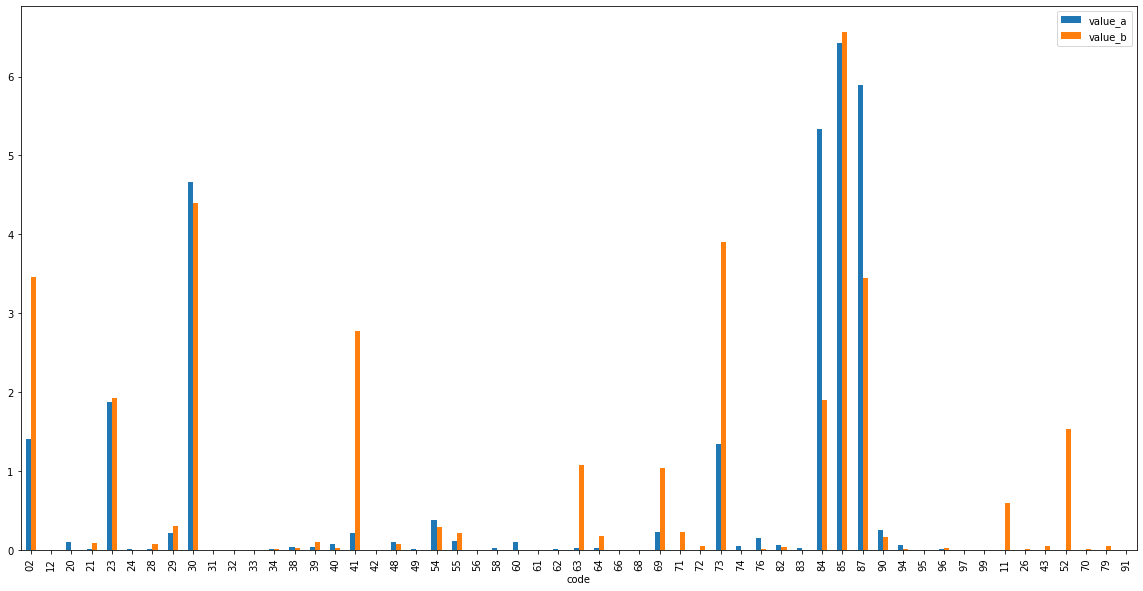

In [9]:
df2.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()

In [ ]:
df2.to_csv('export_' + str(partner) + '_' + str(reporter) + '_' + str(period) + '_' + str(cc) + '.csv')

# CTH4

In [10]:
cc = 'AG4'
data_out, data_in = tta.get_export_data(reporter, partner, period, cc) 
data = tta.compare(data_out, data_in)
df4 = tta.prepare(data)

{'r': '699', 'p': '418', 'rg': 2, 'ps': '2019', 'px': 'HS', 'cc': 'AG4', 'freq': 'A', 'max': '100000'}
{'r': '418', 'p': '699', 'rg': 1, 'ps': '2019', 'px': 'HS', 'cc': 'AG4', 'freq': 'A', 'max': '100000'}


In [ ]:
df4.sort_values(by=['code'])

In [ ]:
df4.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()

In [ ]:
df4.to_csv('export_' + str(partner) + '_' + str(reporter) + '_' + str(period) + '_' + str(cc) + '.csv')

# CTH6

In [4]:
cc = 'AG6'
data_out, data_in = tta.get_export_data(reporter, partner, period, cc) 
data = tta.compare(data_out, data_in)
df6 = tta.prepare(data)

{'r': '699', 'p': '418', 'rg': 2, 'ps': '2019', 'px': 'HS', 'cc': 'AG6', 'freq': 'A', 'max': '100000'}
{'r': '418', 'p': '699', 'rg': 1, 'ps': '2019', 'px': 'HS', 'cc': 'AG6', 'freq': 'A', 'max': '100000'}


In [6]:
df6.sort_values(by=['code'])

NameError: name 'df6' is not defined

In [ ]:
df6.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()

In [ ]:
df6.to_csv('export_' + str(partner) + '_' + str(reporter) + '_' + str(period) + '_' + str(cc) + '.csv')

# Aggregation

In [ ]:
df = df6
df['CTH6'] = df['code']
df['CTH4'] = df['code'].str.slice(0,4)
df['CTH2'] = df['code'].str.slice(0,2)
df['QR'] = df['quantity_a'] / df['quantity_b']
df['VR'] = df['value_a'] / df['value_b']
df.groupby(['CTH2']).sum()

# Summary

In [ ]:
print("Total Export, as per reporter data:", df['value_a'].sum(), " million USD.")
print("Total Import, as per partner data:", df['value_b'].sum(), " million USD.")

# Filter
Remove data where the value difference is less than 10 million and percentage difference is less than 10%

In [ ]:
percentage_cutoff = 10 # value to filter
value_diff_cutoff = 1 # value to filter

dfi = df2 # Change to required data_frame
dfi = dfi[(dfi['value_pct_abs'] > percentage_cutoff) & (dfi['value_diff_abs'] > value_diff_cutoff)]
dfi.sort_values(by=['value_diff_abs'], ascending=False)

In [ ]:
dfi.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()